## Data Loading and Pre-processing

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [103]:
#reading training and validation data and its labels
train_data = pd.read_csv(parent_directory + '/Data/training_data.csv')
val_data = pd.read_csv(parent_directory + '/Data/validation_data.csv')
test_data = pd.read_csv(parent_directory + '/Data/testing_data.csv')

train_labels = train_data['label'].values
val_labels = val_data['label'].values
test_labels = test_data['label'].values

train_labels = np.array(train_labels,dtype='float64')
val_labels = np.array(val_labels,dtype='float64')
test_labels = np.array(test_labels,dtype='float64')

In [104]:
#converting the 784 images into (28,28,1) to train a CNN
train_images = []
val_images = []
test_images = []

for i in range(len(train_data)):
    train_images.append(train_data.iloc[i,:].values[1:].reshape(28,28,1))
for i in range(len(val_data)):
    val_images.append(val_data.iloc[i,:].values[1:].reshape(28,28,1))
for i in range(len(test_data)):
    test_images.append(test_data.iloc[i,:].values[1:].reshape(28,28,1))

In [105]:
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    return

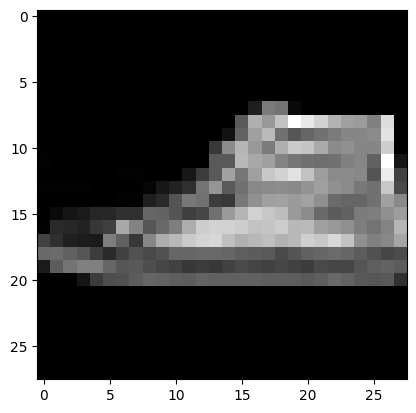

In [106]:
plot_img(train_images[1])

In [107]:
#scaling images so that the pixel values fall in between 0 and 1
train_images = np.array(train_images,dtype='float64')/255.0
val_images = np.array(val_images,dtype='float64')/255.0
test_images = np.array(test_images,dtype='float64')/255.0

train_labels = train_labels.reshape(train_labels.shape[0],1)
val_labels = val_labels.reshape(val_labels.shape[0],1)
test_labels = test_labels.reshape(test_labels.shape[0],1)

In [108]:
#printing train validation split data shapes
print('Training Data Shape :', train_images.shape)
print('Training Labels Shape :', train_labels.shape)
print('Validation Data Shape :', val_images.shape)
print('Validation Labels Shape :', val_labels.shape)
print('Testing Data Shape :', test_images.shape)
print('Testing Labels Shape :', test_labels.shape)

Training Data Shape : (45000, 28, 28, 1)
Training Labels Shape : (45000, 1)
Validation Data Shape : (15000, 28, 28, 1)
Validation Labels Shape : (15000, 1)
Testing Data Shape : (10000, 28, 28, 1)
Testing Labels Shape : (10000, 1)


## Training

In [109]:
from utils import ModelResNet

In [110]:
res_net = ModelResNet()

In [111]:
input_shape = (28,28,1)
num_classes=10
num_residual_blocks = 3
filters = 64

In [112]:
model = res_net.create_model_resnet(input_shape, num_classes, num_residual_blocks, filters)

In [113]:
model.summary()

Model: "model_87"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 28, 28, 64)           640       ['input_3[0][0]']             
                                                                                                  
 conv2d_15 (Conv2D)          (None, 28, 28, 64)           36928     ['conv2d_14[0][0]']           
                                                                                                  
 conv2d_16 (Conv2D)          (None, 28, 28, 64)           36928     ['conv2d_15[0][0]']           
                                                                                           

In [114]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(val_images, val_labels),callbacks=[early_stopping],)

Epoch 1/30
1407/1407 [==============================] - 222s 157ms/step - loss: 0.8074 - accuracy: 0.6938 - val_loss: 0.5167 - val_accuracy: 0.8048
Epoch 2/30
1407/1407 [==============================] - 230s 163ms/step - loss: 0.4394 - accuracy: 0.8387 - val_loss: 0.4311 - val_accuracy: 0.8418
Epoch 3/30
1407/1407 [==============================] - 234s 166ms/step - loss: 0.3590 - accuracy: 0.8692 - val_loss: 0.3803 - val_accuracy: 0.8666
Epoch 4/30
1407/1407 [==============================] - 451s 320ms/step - loss: 0.3154 - accuracy: 0.8844 - val_loss: 0.3040 - val_accuracy: 0.8915
Epoch 5/30
1407/1407 [==============================] - 301s 214ms/step - loss: 0.2873 - accuracy: 0.8946 - val_loss: 0.2833 - val_accuracy: 0.8986
Epoch 6/30
1407/1407 [==============================] - 250s 177ms/step - loss: 0.2671 - accuracy: 0.9014 - val_loss: 0.3149 - val_accuracy: 0.8891
Epoch 7/30
1407/1407 [==============================] - 256s 182ms/step - loss: 0.2522 - accuracy: 0.9064 - val_

In [88]:
model.save_weights('weights/weights_res_net_3_64.h5')

## Model Evaluation

In [84]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 11s 35ms/step - loss: 0.1954 - accuracy: 0.9295


[0.19544671475887299, 0.9294999837875366]

In [85]:
model.evaluate(val_images, val_labels)

469/469 [==============================] - 17s 36ms/step - loss: 0.2226 - accuracy: 0.9228


[0.22257664799690247, 0.9228000044822693]

In [86]:
val_pred = model.predict(val_images)
val_pred = np.argmax(val_pred,axis=1)

test_pred = model.predict(test_images)
test_pred = np.argmax(test_pred,axis=1)

313/313 [==============================] - 11s 35ms/step


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
def evaluation_metrics(val_labels, val_pred):
    # Creating the confusion matrix
    conf_matrix = confusion_matrix(val_labels, val_pred)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


    # Calculating precision, recall, and F1 score
    precision = precision_score(val_labels, val_pred, average='weighted')
    recall = recall_score(val_labels, val_pred, average='weighted')
    f1 = f1_score(val_labels, val_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

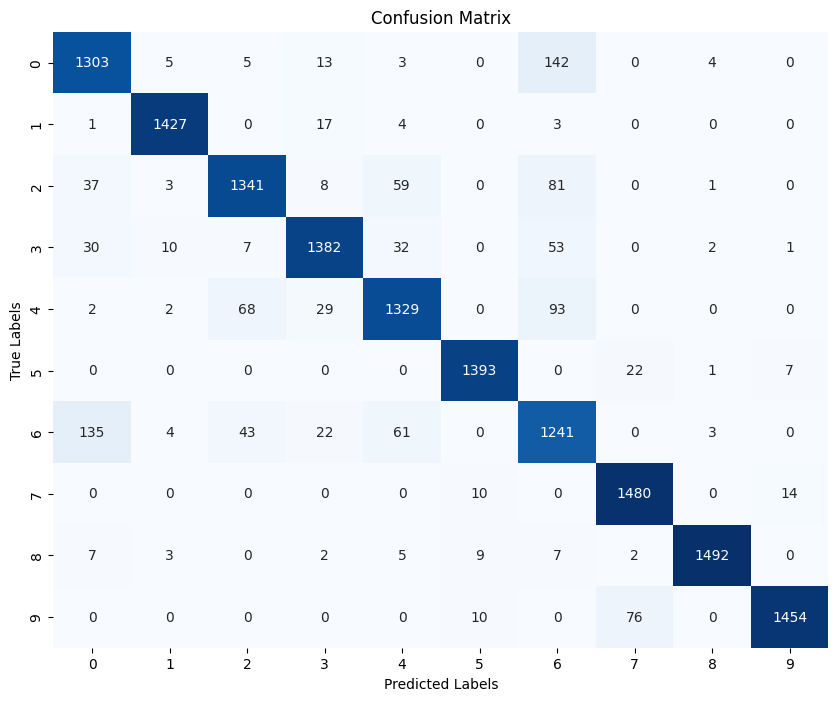

Precision: 0.924380296617354
Recall: 0.9228
F1 Score: 0.9232913119039696


In [77]:
evaluation_metrics(val_labels, val_pred)

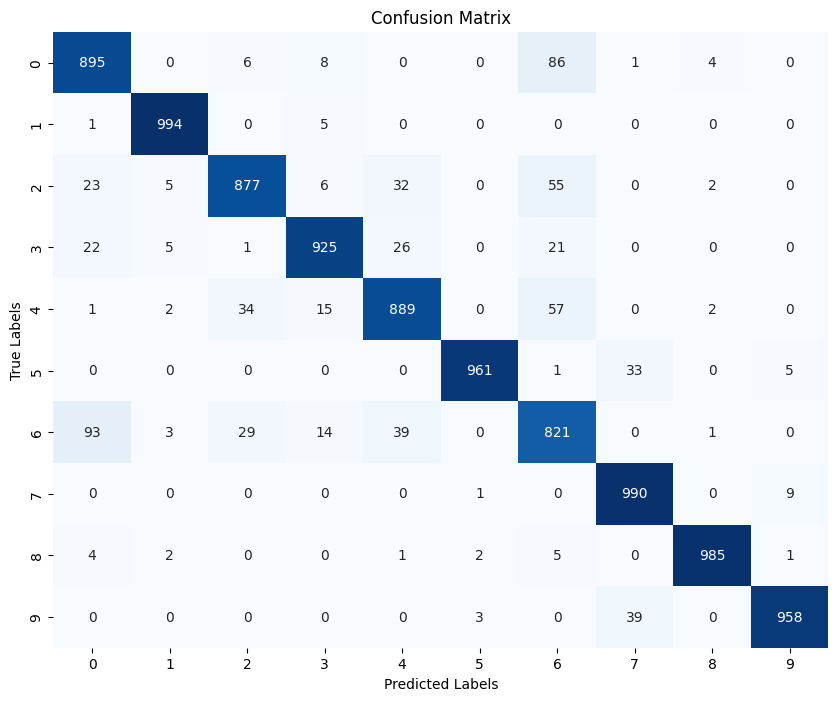

Precision: 0.9307595735628543
Recall: 0.9295
F1 Score: 0.9298297322474715


In [87]:
evaluation_metrics(test_labels, test_pred)

## Interpreting the Model

In [115]:
model.load_weights('weights/weights_res_net_3_64.h5')

1/1 [==============================] - 0s 17ms/step


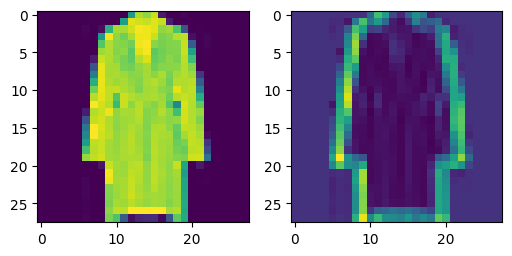

In [119]:
import tensorflow as tf
def generate_grad_cam(model, last_conv_layer_name, image, class_index):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(image)
        class_output = predictions[:, class_index]

    grads = tape.gradient(class_output, conv_output)
    pooled_grads = tf.reduce_mean(tf.nn.relu(grads), axis=(0, 1, 2))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    heatmap /= np.max(heatmap)

    return heatmap

img = val_images[2]
class_index = np.argmax(model.predict(img.reshape(1,28,28,1)))


last_conv_layer_name = 'conv2d_14'  
heatmap = generate_grad_cam(model, last_conv_layer_name, img.reshape(1,28,28,1), class_index)

fig, axs = plt.subplots(1, 2, figsize=(6,6))

axs[0].imshow(img)
axs[1].imshow(heatmap)
plt.show()

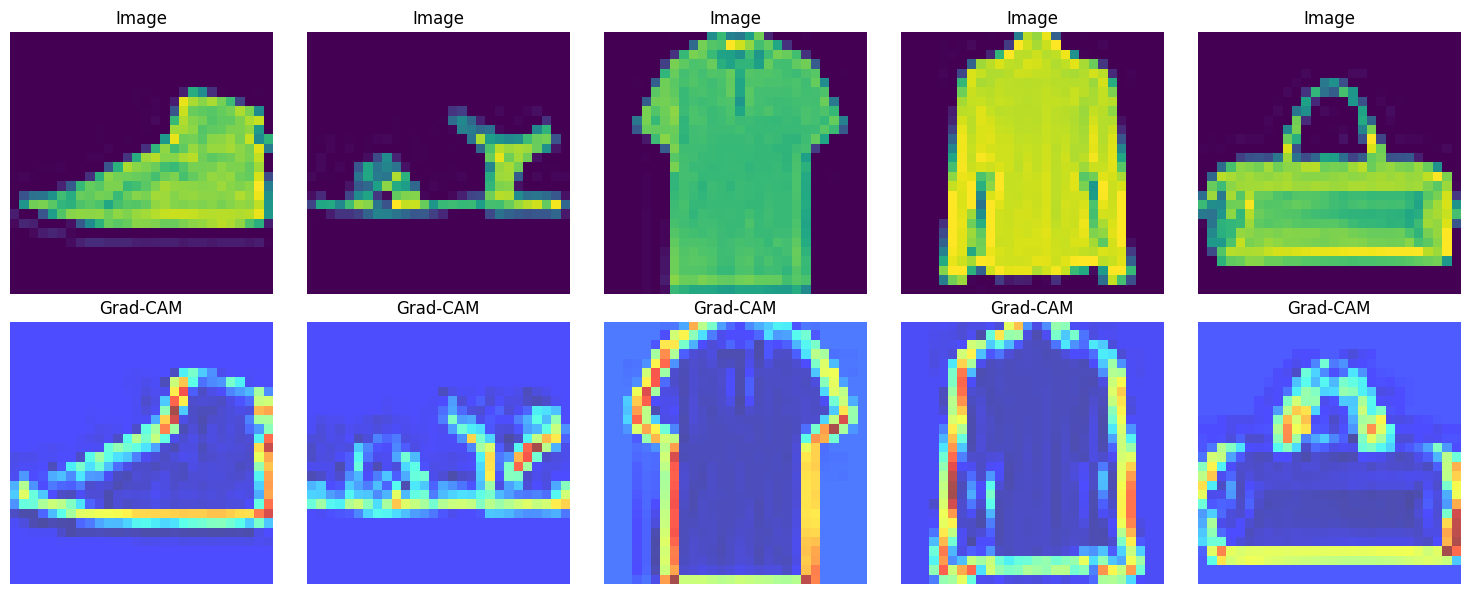

In [120]:
import matplotlib.pyplot as plt
import numpy as np

images = val_images[35:40]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Image")
    axs[0, i].axis('off')

    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer_name, images[i].reshape(1,28,28,1), class_index), cmap='jet', alpha=0.7)  # Adjust alpha for transparency
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

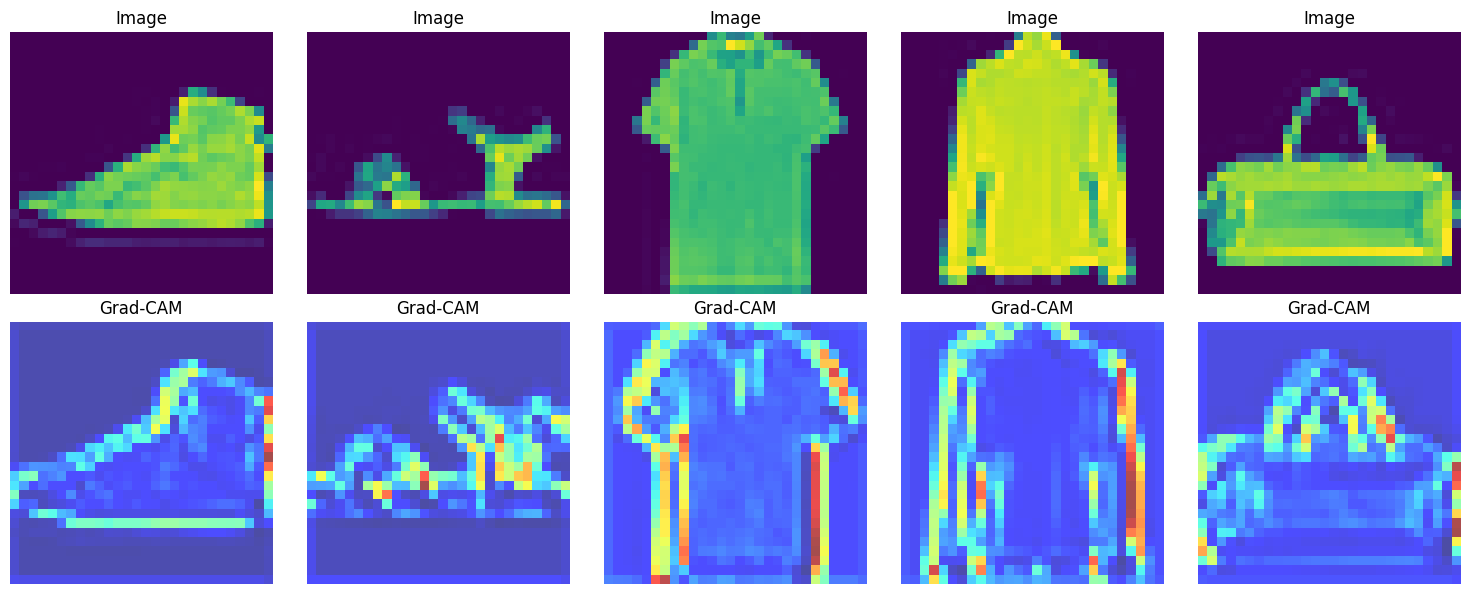

In [121]:
last_conv_layer_name = 'conv2d_15'  

images = val_images[35:40]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axs[0, i].imshow(images[i])
    axs[0, i].set_title("Image")
    axs[0, i].axis('off')

    axs[1, i].imshow(generate_grad_cam(model, last_conv_layer_name, images[i].reshape(1,28,28,1), class_index), cmap='jet', alpha=0.7)  # Adjust alpha for transparency
    axs[1, i].set_title("Grad-CAM")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()